In [1]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
pd.set_option('display.max_colwidth', -1)
import re

In [2]:
df = pd.read_csv('data/twint_scraped_clean.csv',  usecols=['date', 'tweet', 'geo'])

In [3]:
df.head()

,date,tweet,geo
0,2021-06-13,"@CFetzRun @DioAlexandro2 @deathforeskin @ALV550 @jonmchu It was definitely required in every public location (library, DMV, etc). Also in most private locations (grocery stores, etc). Other countries are suffering too, lol. Not just US. Japan is still in a state of emergency. Canada has barely any vaccines. The virus canâ€™t be stopped.",chicago
1,2021-06-13,"Went to the park where a guitar-bass-drum jazz trio plays every Sunday and I GOT TO SEE MORE FRIENDS, INCLUDING SOME TWO DAYS IN A ROW. A vaccine and a summer are some pretty wonderful things",chicago
2,2021-06-13,Covid cases fall across US but experts warn of dangers of vaccine hesitancy - The Guardian https://t.co/dcocHClLVd,chicago
3,2021-06-13,Sogard avoided that tag at second like it was the COVID vaccine,chicago
4,2021-06-13,"@TheEliKlein @RyanKemper10 I think your cult like behavior regarding vaccines is weird. I also believe old people should do what they want with their bodies. Do I think the benefits outweigh the risks for older people? Sure. Their call, not mine. If only you didnâ€™t pretend adverse effects donâ€™t exist.",chicago


## Regex

In [4]:
df.head(20)

,date,tweet,geo
0,2021-06-13,"@CFetzRun @DioAlexandro2 @deathforeskin @ALV550 @jonmchu It was definitely required in every public location (library, DMV, etc). Also in most private locations (grocery stores, etc). Other countries are suffering too, lol. Not just US. Japan is still in a state of emergency. Canada has barely any vaccines. The virus canâ€™t be stopped.",chicago
1,2021-06-13,"Went to the park where a guitar-bass-drum jazz trio plays every Sunday and I GOT TO SEE MORE FRIENDS, INCLUDING SOME TWO DAYS IN A ROW. A vaccine and a summer are some pretty wonderful things",chicago
2,2021-06-13,Covid cases fall across US but experts warn of dangers of vaccine hesitancy - The Guardian https://t.co/dcocHClLVd,chicago
3,2021-06-13,Sogard avoided that tag at second like it was the COVID vaccine,chicago
4,2021-06-13,"@TheEliKlein @RyanKemper10 I think your cult like behavior regarding vaccines is weird. I also believe old people should do what they want with their bodies. Do I think the benefits outweigh the risks for older people? Sure. Their call, not mine. If only you didnâ€™t pretend adverse effects donâ€™t exist.",chicago
5,2021-06-13,"@ThatShtBritical She hit me today talmbout we need to sit down and talk, my heart dropped Iâ€™m like about what granny? She say about this vaccine and when you gonna get it ðŸ˜’",chicago
6,2021-06-13,"my favorite thing about this is that it's about all sorts of things. the weather, the traffic, the buffet line... ðŸ˜‚ðŸ˜‚ðŸ˜‚",chicago
7,2021-06-13,"As COVID-19 cases wane, vaccine-lagging areas still see risk https://t.co/Xqf2l3PrLr via @Yahoo",chicago
8,2021-06-13,@BadVaccineTakes I did get a bizarre tinnitus from the vaccine and was told by my doctor that it is a side effect... so what is this about? The more you downplay legitimate things the more suspicious people get.,chicago
9,2021-06-13,"Texas judge tosses hospital workers' COVID-19 vaccine requirement lawsuit, says they can 'work somewhere else' https://t.co/wtGHw2S3PX",chicago


In [5]:
#creating a new clean column to remove URLs and @ mentions

df['clean_text'] = df['tweet']
df['clean_text'] = [re.sub(r'(http://[^"\s]+)|(@\w+)', '', tweet) for tweet in df['clean_text']]
df['clean_text'] = [re.sub(r'(https://[^"\s]+)|(@\w+)', '', tweet) for tweet in df['clean_text']]
df['clean_text'] = [re.sub(r'@[^\s]+', '', tweet) for tweet in df['clean_text']]
df['clean_text'] = [re.sub(r"#", " ", tweet) for tweet in df['clean_text']]
df['clean_text'] = [re.sub(r"â€™", "'", tweet) for tweet in df['clean_text']]


In [6]:
df.head()

,date,tweet,geo,clean_text
0,2021-06-13,"@CFetzRun @DioAlexandro2 @deathforeskin @ALV550 @jonmchu It was definitely required in every public location (library, DMV, etc). Also in most private locations (grocery stores, etc). Other countries are suffering too, lol. Not just US. Japan is still in a state of emergency. Canada has barely any vaccines. The virus canâ€™t be stopped.",chicago,"It was definitely required in every public location (library, DMV, etc). Also in most private locations (grocery stores, etc). Other countries are suffering too, lol. Not just US. Japan is still in a state of emergency. Canada has barely any vaccines. The virus can't be stopped."
1,2021-06-13,"Went to the park where a guitar-bass-drum jazz trio plays every Sunday and I GOT TO SEE MORE FRIENDS, INCLUDING SOME TWO DAYS IN A ROW. A vaccine and a summer are some pretty wonderful things",chicago,"Went to the park where a guitar-bass-drum jazz trio plays every Sunday and I GOT TO SEE MORE FRIENDS, INCLUDING SOME TWO DAYS IN A ROW. A vaccine and a summer are some pretty wonderful things"
2,2021-06-13,Covid cases fall across US but experts warn of dangers of vaccine hesitancy - The Guardian https://t.co/dcocHClLVd,chicago,Covid cases fall across US but experts warn of dangers of vaccine hesitancy - The Guardian
3,2021-06-13,Sogard avoided that tag at second like it was the COVID vaccine,chicago,Sogard avoided that tag at second like it was the COVID vaccine
4,2021-06-13,"@TheEliKlein @RyanKemper10 I think your cult like behavior regarding vaccines is weird. I also believe old people should do what they want with their bodies. Do I think the benefits outweigh the risks for older people? Sure. Their call, not mine. If only you didnâ€™t pretend adverse effects donâ€™t exist.",chicago,"I think your cult like behavior regarding vaccines is weird. I also believe old people should do what they want with their bodies. Do I think the benefits outweigh the risks for older people? Sure. Their call, not mine. If only you didn't pretend adverse effects don't exist."


## Textblob

In [7]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [8]:
df['tb_polarity'] = df['clean_text'].apply(get_polarity)

In [9]:
df['tb_sentiment']=''
df.loc[df.tb_polarity>0,'tb_sentiment']='positive'
df.loc[df.tb_polarity==0,'tb_sentiment']='neutral'
df.loc[df.tb_polarity<0,'tb_sentiment']='negative'

In [10]:
df.head()

,date,tweet,geo,clean_text,tb_polarity,tb_sentiment
0,2021-06-13,"@CFetzRun @DioAlexandro2 @deathforeskin @ALV550 @jonmchu It was definitely required in every public location (library, DMV, etc). Also in most private locations (grocery stores, etc). Other countries are suffering too, lol. Not just US. Japan is still in a state of emergency. Canada has barely any vaccines. The virus canâ€™t be stopped.",chicago,"It was definitely required in every public location (library, DMV, etc). Also in most private locations (grocery stores, etc). Other countries are suffering too, lol. Not just US. Japan is still in a state of emergency. Canada has barely any vaccines. The virus can't be stopped.",0.175000,positive
1,2021-06-13,"Went to the park where a guitar-bass-drum jazz trio plays every Sunday and I GOT TO SEE MORE FRIENDS, INCLUDING SOME TWO DAYS IN A ROW. A vaccine and a summer are some pretty wonderful things",chicago,"Went to the park where a guitar-bass-drum jazz trio plays every Sunday and I GOT TO SEE MORE FRIENDS, INCLUDING SOME TWO DAYS IN A ROW. A vaccine and a summer are some pretty wonderful things",0.583333,positive
2,2021-06-13,Covid cases fall across US but experts warn of dangers of vaccine hesitancy - The Guardian https://t.co/dcocHClLVd,chicago,Covid cases fall across US but experts warn of dangers of vaccine hesitancy - The Guardian,0.000000,neutral
3,2021-06-13,Sogard avoided that tag at second like it was the COVID vaccine,chicago,Sogard avoided that tag at second like it was the COVID vaccine,0.000000,neutral
4,2021-06-13,"@TheEliKlein @RyanKemper10 I think your cult like behavior regarding vaccines is weird. I also believe old people should do what they want with their bodies. Do I think the benefits outweigh the risks for older people? Sure. Their call, not mine. If only you didnâ€™t pretend adverse effects donâ€™t exist.",chicago,"I think your cult like behavior regarding vaccines is weird. I also believe old people should do what they want with their bodies. Do I think the benefits outweigh the risks for older people? Sure. Their call, not mine. If only you didn't pretend adverse effects don't exist.",0.053333,positive


## Text Exploration

In [11]:
# inequal_df = df.loc[df['vader_sentiment'] != df['tb_sentiment']]
# inequal_df.reset_index(inplace=True)
# inequal_df[['clean_text_col', 'vader_sentiment', 'tb_sentiment']].head(50)

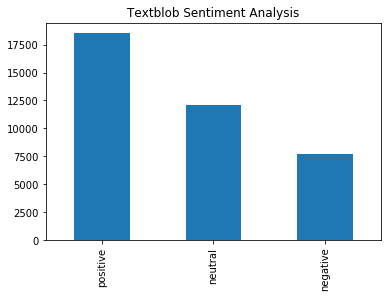

In [12]:
df.tb_sentiment.value_counts().plot(kind='bar',title="Textblob Sentiment Analysis")

In [23]:
negatives = df[df['tb_sentiment'] == 'negative']
positives = df[df['tb_sentiment'] == 'positive']

In [14]:
import nltk
import string
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')
stopwords_list += string.punctuation
punct_list = ["''", '""', '...', '``']
stopwords_list += punct_list

In [15]:
def tokenize(tweet):
    tokens = nltk.word_tokenize(tweet)
    words_lower = [word.lower() for word in tokens]
    words_stopped = [word for word in words_lower if word not in stopwords_list]
    return words_stopped

In [17]:
processed_data_positive = list(map(tokenize, positives['clean_text']))

processed_data_positive[0]

['definitely',
 'required',
 'every',
 'public',
 'location',
 'library',
 'dmv',
 'etc',
 'also',
 'private',
 'locations',
 'grocery',
 'stores',
 'etc',
 'countries',
 'suffering',
 'lol',
 'us',
 'japan',
 'still',
 'state',
 'emergency',
 'canada',
 'barely',
 'vaccines',
 'virus',
 'ca',
 "n't",
 'stopped']

In [20]:
processed_data_negative = list(map(tokenize, negatives['clean_text']))

processed_data_negative[0]

['hit',
 'today',
 'talmbout',
 'need',
 'sit',
 'talk',
 'heart',
 'dropped',
 "'m",
 'like',
 'granny',
 'say',
 'vaccine',
 'gon',
 'na',
 'get',
 'ðÿ˜',
 '’']

In [24]:
pos_tweet_concat = []
for tweet in processed_data_positive:
    pos_tweet_concat += tweet
    
pos_tweet_freqdist = FreqDist(pos_tweet_concat)
pos_tweet_freqdist.most_common(2000)

[('vaccine', 16249),
 ("'s", 4576),
 ('get', 4332),
 ('vaccines', 4042),
 ("n't", 3947),
 ('covid', 2955),
 ('people', 2605),
 ('first', 2399),
 ('got', 2231),
 ('amp', 2230),
 ("'m", 1898),
 ('getting', 1579),
 ('new', 1524),
 ('dose', 1503),
 ('like', 1409),
 ('one', 1335),
 ('today', 1267),
 ('vaccinated', 1240),
 ('’', 1192),
 ('covid-19', 1175),
 ('shot', 1156),
 ('ðÿ', 1090),
 ('good', 1084),
 ("'re", 994),
 ('covid19', 963),
 ('us', 953),
 ('know', 942),
 ('would', 930),
 ('need', 907),
 ('still', 892),
 ('many', 892),
 ('take', 844),
 ('right', 772),
 ('time', 771),
 ('pfizer', 770),
 ('day', 757),
 ('available', 743),
 ('second', 734),
 ('make', 724),
 ('also', 719),
 ('even', 717),
 ('really', 707),
 ("'ve", 705),
 ('moderna', 702),
 ('go', 699),
 ('appointment', 672),
 ('see', 663),
 ('going', 661),
 ('everyone', 658),
 ('”', 648),
 ('better', 645),
 ('much', 632),
 ('work', 628),
 ('ca', 625),
 ('great', 624),
 ('back', 622),
 ('think', 621),
 ('year', 616),
 ('want', 608),

In [25]:
neg_tweet_concat = []
for tweet in processed_data_negative:
    neg_tweet_concat += tweet
    
neg_tweet_freqdist = FreqDist(neg_tweet_concat)
neg_tweet_freqdist.most_common(2000)

[('vaccine', 6739),
 ("n't", 2285),
 ("'s", 2052),
 ('get', 1742),
 ('vaccines', 1637),
 ('people', 1303),
 ('covid', 1210),
 ("'m", 913),
 ('got', 855),
 ('like', 787),
 ('amp', 761),
 ('getting', 710),
 ('one', 551),
 ("'re", 464),
 ('take', 457),
 ('vaccinated', 434),
 ('would', 434),
 ('still', 428),
 ('us', 411),
 ('know', 368),
 ('go', 365),
 ('even', 351),
 ('going', 350),
 ('dose', 346),
 ('bad', 346),
 ('want', 338),
 ('shot', 335),
 ('ca', 334),
 ('need', 333),
 ('second', 331),
 ('shit', 326),
 ('covid-19', 318),
 ("'ve", 310),
 ('today', 303),
 ('think', 301),
 ('time', 300),
 ('also', 283),
 ('day', 278),
 ('sick', 275),
 ('trump', 273),
 ('’', 270),
 ('long', 260),
 ('ðÿ', 259),
 ('new', 257),
 ('work', 254),
 ('make', 250),
 ('really', 245),
 ('first', 245),
 ('covid19', 245),
 ('fucking', 242),
 ('virus', 237),
 ('could', 234),
 ('year', 232),
 ('least', 229),
 ('2', 229),
 ('pfizer', 222),
 ('appointment', 222),
 ('feel', 221),
 ('rollout', 220),
 ('black', 219),
 ('si

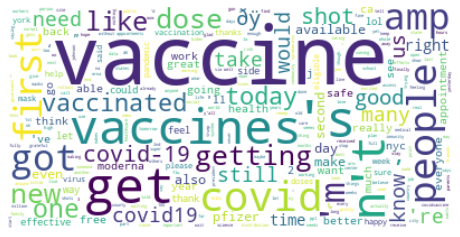

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white", max_words=2000)
wc.generate_from_frequencies(pos_tweet_freqdist)

plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.margins(x=1, y=1)
plt.show()


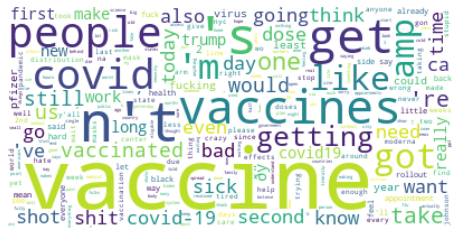

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white", max_words=2000)
wc.generate_from_frequencies(neg_tweet_freqdist)

plt.figure(figsize=(8,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.margins(x=1, y=1)
plt.show()

In [36]:
df.head()

,date,tweet,geo,clean_text,tb_polarity,tb_sentiment
0,2021-06-13,"@CFetzRun @DioAlexandro2 @deathforeskin @ALV550 @jonmchu It was definitely required in every public location (library, DMV, etc). Also in most private locations (grocery stores, etc). Other countries are suffering too, lol. Not just US. Japan is still in a state of emergency. Canada has barely any vaccines. The virus canâ€™t be stopped.",chicago,"It was definitely required in every public location (library, DMV, etc). Also in most private locations (grocery stores, etc). Other countries are suffering too, lol. Not just US. Japan is still in a state of emergency. Canada has barely any vaccines. The virus can't be stopped.",0.175000,positive
1,2021-06-13,"Went to the park where a guitar-bass-drum jazz trio plays every Sunday and I GOT TO SEE MORE FRIENDS, INCLUDING SOME TWO DAYS IN A ROW. A vaccine and a summer are some pretty wonderful things",chicago,"Went to the park where a guitar-bass-drum jazz trio plays every Sunday and I GOT TO SEE MORE FRIENDS, INCLUDING SOME TWO DAYS IN A ROW. A vaccine and a summer are some pretty wonderful things",0.583333,positive
2,2021-06-13,Covid cases fall across US but experts warn of dangers of vaccine hesitancy - The Guardian https://t.co/dcocHClLVd,chicago,Covid cases fall across US but experts warn of dangers of vaccine hesitancy - The Guardian,0.000000,neutral
3,2021-06-13,Sogard avoided that tag at second like it was the COVID vaccine,chicago,Sogard avoided that tag at second like it was the COVID vaccine,0.000000,neutral
4,2021-06-13,"@TheEliKlein @RyanKemper10 I think your cult like behavior regarding vaccines is weird. I also believe old people should do what they want with their bodies. Do I think the benefits outweigh the risks for older people? Sure. Their call, not mine. If only you didnâ€™t pretend adverse effects donâ€™t exist.",chicago,"I think your cult like behavior regarding vaccines is weird. I also believe old people should do what they want with their bodies. Do I think the benefits outweigh the risks for older people? Sure. Their call, not mine. If only you didn't pretend adverse effects don't exist.",0.053333,positive


In [56]:
sent_over_time = df[['date', 'tb_polarity']].sort_values(by ='date')
sent_over_time['date'] =pd.to_datetime(sent_over_time['date'])

,date,tb_polarity
38342,2020-12-31,0.400000
6262,2020-12-31,0.281818
6261,2020-12-31,0.000000
6260,2020-12-31,0.041667
6259,2020-12-31,0.151389
...,...,...
729,2021-06-13,0.000000
728,2021-06-13,0.000000
727,2021-06-13,0.000000
741,2021-06-13,0.000000


In [58]:
sent_over_time = sent_over_time.groupby('date').mean()

Text(0, 0.5, 'Sentiment Score')

<Figure size 1800x1080 with 0 Axes>

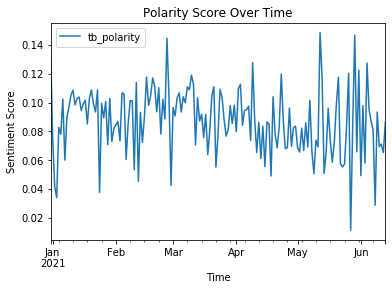

In [69]:
# plt.figure(x=0)

plt.figure(figsize=(25, 15))
fig = sent_over_time.plot(kind='line',title="Polarity Score Over Time")
fig.set_xlabel('Time')
fig.set_ylabel('Sentiment Score')

In [ ]:
sent_over_time = df[['date', 'tb_polarity', 'geo']].sort_values(by ='date')
sent_over_time['date'] =pd.to_datetime(sent_over_time['date'])
sent_over_time

In [ ]:
sent_over_time = sent_over_time.groupby('date').mean()

In [94]:
def sent_by_location(df, location):
    location_df = df[df['geo'] == location]
    return location_df[['date', 'tb_polarity']].sort_values(by ='date').groupby('date').mean()

In [97]:
hou_df = sent_by_location(df, 'houston')
chi_df = sent_by_location(df, 'chicago')
nyc_df = sent_by_location(df, 'nyc')
la_df = sent_by_location(df, 'la')

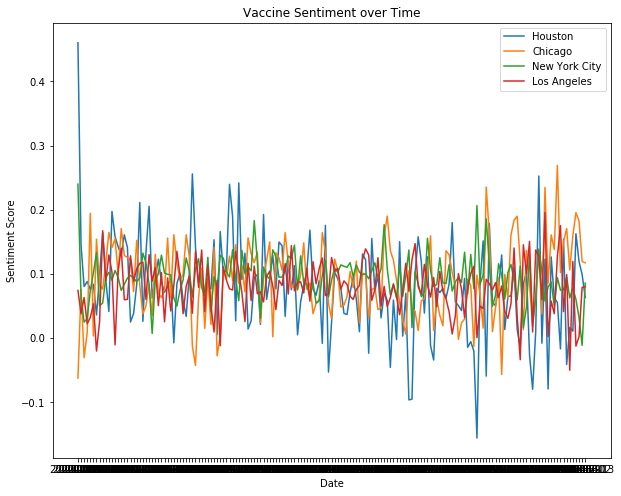

In [119]:
fig, ax = plt.subplots(figsize = (10,8))  # Create a figure and an axes.
ax.plot(hou_df, label='Houston')  # Plot some data on the axes.
ax.plot(chi_df, label='Chicago')  # Plot more data on the axes...
ax.plot(nyc_df, label='New York City')
ax.plot(la_df, label='Los Angeles')
ax.set_xlabel('Date')  # Add an x-label to the axes.
ax.set_ylabel('Sentiment Score')  # Add a y-label to the axes.
ax.set_title("Vaccine Sentiment over Time")  # Add a title to the axes.
ax.legend()  # Add a legend.